In [1]:
!pip install ipython-autotime
# !pip install -U scikit-learn
%load_ext autotime

time: 2.7 ms (started: 2021-01-24 18:08:17 +00:00)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.31 ms (started: 2021-01-24 18:08:17 +00:00)


In [3]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/My Drive/ML/ml-project-master/src
time: 238 ms (started: 2021-01-24 18:08:17 +00:00)


In [4]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

from utility import *

time: 2.34 s (started: 2021-01-24 18:08:17 +00:00)


In [5]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

time: 17.6 ms (started: 2021-01-24 18:08:20 +00:00)


# Import Dataset

In [6]:
def load_cup():
    ml_cup = np.delete(np.genfromtxt('ML-CUP20-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_cup_blind():
    return np.delete(np.genfromtxt('ML-CUP20-TS.csv',
                                   delimiter=','), obj=0, axis=1)
    
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

time: 8 ms (started: 2021-01-24 18:08:20 +00:00)


In [7]:
X, y = load_cup()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

time: 30.3 ms (started: 2021-01-24 18:08:20 +00:00)


In [8]:
print(X.shape)
print(y.shape)

(1524, 10)
(1524, 2)
time: 978 µs (started: 2021-01-24 18:08:20 +00:00)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L2

# Function to create model, required for KerasRegressor
def create_model(learn_rate=0.01, momentum=0.9, neurons_layer_1=130,
                 init_mode='uniform', activation='sigmoid',  weight_decay = 0.00001,
                 nesterov = True, neurons_layer_2 = 30):
  # create model
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(10)))
    model.add(Dense(neurons_layer_1, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(neurons_layer_2, activation=activation,
                    kernel_initializer=init_mode, kernel_regularizer= L2(weight_decay)))
    model.add(Dense(2))
    optimizer = SGD(
      learning_rate=learn_rate, momentum=momentum, nesterov=nesterov)
    # Compile model
    model.compile(optimizer=optimizer,
              loss=euclidean_distance_loss)
    return model

time: 12.4 ms (started: 2021-01-24 18:08:20 +00:00)


In [10]:
import time
begin = time.time()

test = []
train = []
val = []
for i in range(0,10):
  model = create_model(momentum=0.8)
  history = model.fit(X_train, y_train,
                      batch_size=128,
                      epochs= 1000,
                      validation_split = 0.1,
                      verbose=2)
  error = mean_euclidean_error(model.predict(X_val), y_val)
  test.append(error)
  train.append(history.history['loss'][-1])
  val.append(history.history['val_loss'][-1])

end = time.time()
print(str(begin-end) + ' Seconds')

Output streaming troncato alle ultime 5000 righe.
Epoch 502/1000
10/10 - 0s - loss: 2.7503 - val_loss: 2.9742
Epoch 503/1000
10/10 - 0s - loss: 2.7456 - val_loss: 2.9889
Epoch 504/1000
10/10 - 0s - loss: 2.7473 - val_loss: 2.9812
Epoch 505/1000
10/10 - 0s - loss: 2.7456 - val_loss: 2.9736
Epoch 506/1000
10/10 - 0s - loss: 2.7539 - val_loss: 2.9670
Epoch 507/1000
10/10 - 0s - loss: 2.7657 - val_loss: 2.9957
Epoch 508/1000
10/10 - 0s - loss: 2.7590 - val_loss: 3.0136
Epoch 509/1000
10/10 - 0s - loss: 2.7442 - val_loss: 2.9977
Epoch 510/1000
10/10 - 0s - loss: 2.7431 - val_loss: 2.9753
Epoch 511/1000
10/10 - 0s - loss: 2.7529 - val_loss: 2.9777
Epoch 512/1000
10/10 - 0s - loss: 2.7509 - val_loss: 3.0020
Epoch 513/1000
10/10 - 0s - loss: 2.7361 - val_loss: 2.9851
Epoch 514/1000
10/10 - 0s - loss: 2.7363 - val_loss: 3.0519
Epoch 515/1000
10/10 - 0s - loss: 2.7366 - val_loss: 2.9680
Epoch 516/1000
10/10 - 0s - loss: 2.7474 - val_loss: 2.9828
Epoch 517/1000
10/10 - 0s - loss: 2.7480 - val_los

In [11]:
print(np.mean(train))
print(np.mean(val))
print(np.mean(test))

2.560086750984192
2.785494327545166
2.8583049536580774
time: 3.38 ms (started: 2021-01-24 18:18:52 +00:00)


In [21]:
len(train)

10

time: 12.8 ms (started: 2021-01-24 18:20:34 +00:00)


In [ ]:
# model = create_model(momentum=0.9)
# history = model.fit(X_train, y_train,
#                     batch_size=512,
#                     epochs= 1000,
#                     validation_data=(X_val, y_val),
#                     verbose=2)

In [ ]:
# plot_loss(history)

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'], '--')
# plt.ylim(2,5)
# plt.xlim(50,700)

In [15]:
# mean_euclidean_error(model.predict(X_val), y_val)

2.871577180907997

time: 57.2 ms (started: 2021-01-24 18:18:52 +00:00)


In [16]:
# prova = model.predict(X_val)

time: 49 ms (started: 2021-01-24 18:18:52 +00:00)


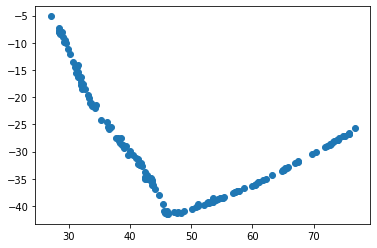

time: 182 ms (started: 2021-01-24 18:18:52 +00:00)


In [17]:
# x1 = prova[:,0]
# y1 = prova[:,1]
# plt.scatter(x1, y1)

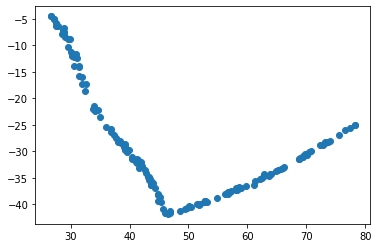

time: 181 ms (started: 2021-01-24 18:18:52 +00:00)


In [18]:
# x_real = y_val[:,0]
# y_real = y_val[:,1]
# plt.scatter(x_real, y_real)

In [19]:
# import pandas as pd

# df = pd.DataFrame(model.predict(load_cup_blind()))
# df.index += 1
# df.to_csv('prova_Marvil_ML-CUP20-TS.csv', index=True, header=False)

time: 619 ms (started: 2021-01-24 18:18:53 +00:00)


In [20]:
# import pandas as pd

# df = pd.DataFrame(prova)
# df.index += 1
# df.to_csv('prova.csv', index=False, header=False)

time: 848 µs (started: 2021-01-24 18:18:53 +00:00)
